In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

customers = pd.read_csv('/content/drive/My Drive/Zeotap/Customers.csv')
products = pd.read_csv('/content/drive/My Drive/Zeotap/Products.csv')
transactions = pd.read_csv('/content/drive/My Drive/Zeotap/Transactions.csv')

Mounted at /content/drive


In [3]:
transactions_customers = pd.merge(transactions, customers, on='CustomerID', how='inner')
df = pd.merge(transactions_customers, products, on='ProductID', how='inner')

In [4]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [5]:
df.shape

(1000, 13)

In [6]:
df = df[[
    'CustomerID', 'CustomerName', 'Region', 'ProductID', 'ProductName', 'Category',
    'Price_y', 'Quantity', 'TotalValue', 'TransactionDate', 'SignupDate'
]]

In [7]:
df.head()

,CustomerID,CustomerName,Region,ProductID,ProductName,Category,Price_y,Quantity,TotalValue,TransactionDate,SignupDate
0,C0199,Andrea Jenkins,Europe,P067,ComfortLiving Bluetooth Speaker,Electronics,300.68,1,300.68,2024-08-25 12:38:23,2022-12-03
1,C0146,Brittany Harvey,Asia,P067,ComfortLiving Bluetooth Speaker,Electronics,300.68,1,300.68,2024-05-27 22:23:54,2024-09-04
2,C0127,Kathryn Stevens,Europe,P067,ComfortLiving Bluetooth Speaker,Electronics,300.68,1,300.68,2024-04-25 07:38:55,2024-04-04
3,C0087,Travis Campbell,South America,P067,ComfortLiving Bluetooth Speaker,Electronics,300.68,2,601.36,2024-03-26 22:55:37,2024-04-11
4,C0070,Timothy Perez,Europe,P067,ComfortLiving Bluetooth Speaker,Electronics,300.68,3,902.04,2024-03-21 15:10:10,2022-03-15


In [8]:
df.shape

(1000, 11)

In [9]:
df.columns

Index(['CustomerID', 'CustomerName', 'Region', 'ProductID', 'ProductName',
       'Category', 'Price_y', 'Quantity', 'TotalValue', 'TransactionDate',
       'SignupDate'],
      dtype='object')

In [10]:
df.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
ProductID,0
ProductName,0
Category,0
Price_y,0
Quantity,0
TotalValue,0
TransactionDate,0


In [11]:
df.dtypes

,0
CustomerID,object
CustomerName,object
Region,object
ProductID,object
ProductName,object
Category,object
Price_y,float64
Quantity,int64
TotalValue,float64
TransactionDate,object


## Distribution of Regions

#### Customer Distribution

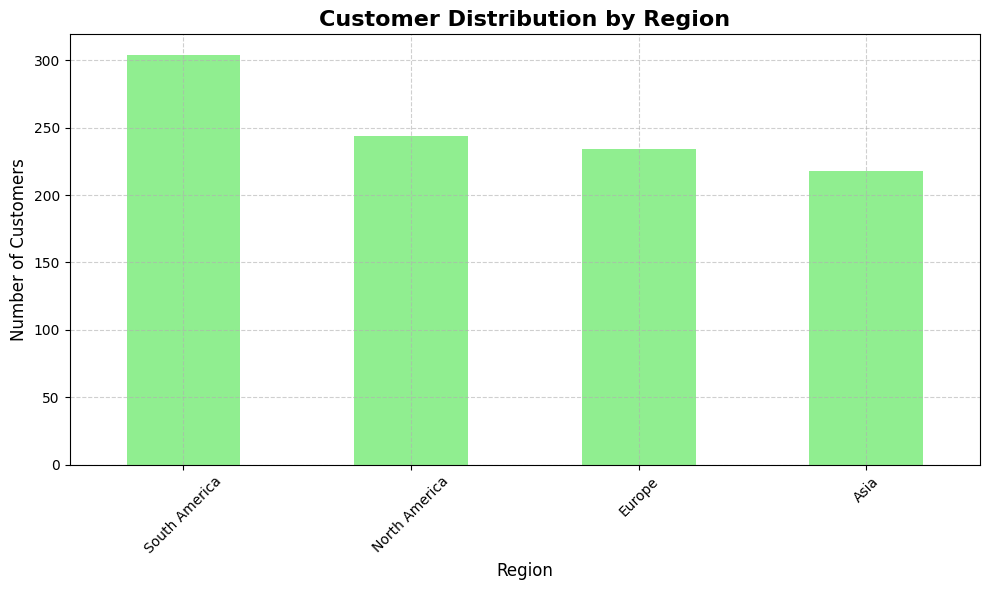

In [12]:
region_customers = df['Region'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
region_customers.plot(kind='bar', color='lightgreen')
plt.title('Customer Distribution by Region', fontsize=16, weight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Revenue Distribution

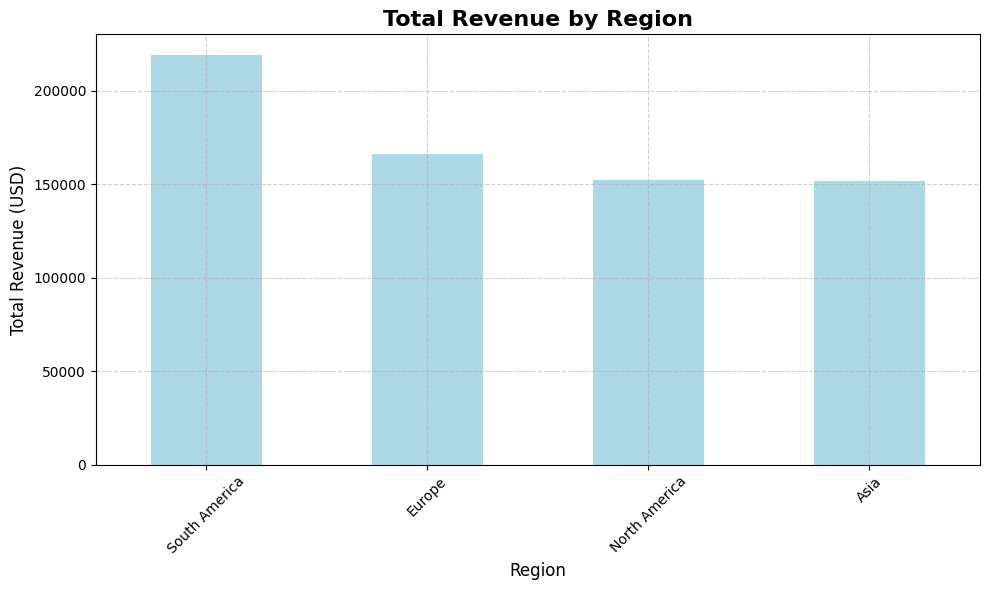

In [13]:
region_revenue = df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
region_revenue.plot(kind='bar', color='lightblue')
plt.title('Total Revenue by Region', fontsize=16, weight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Revenue Generation per customer

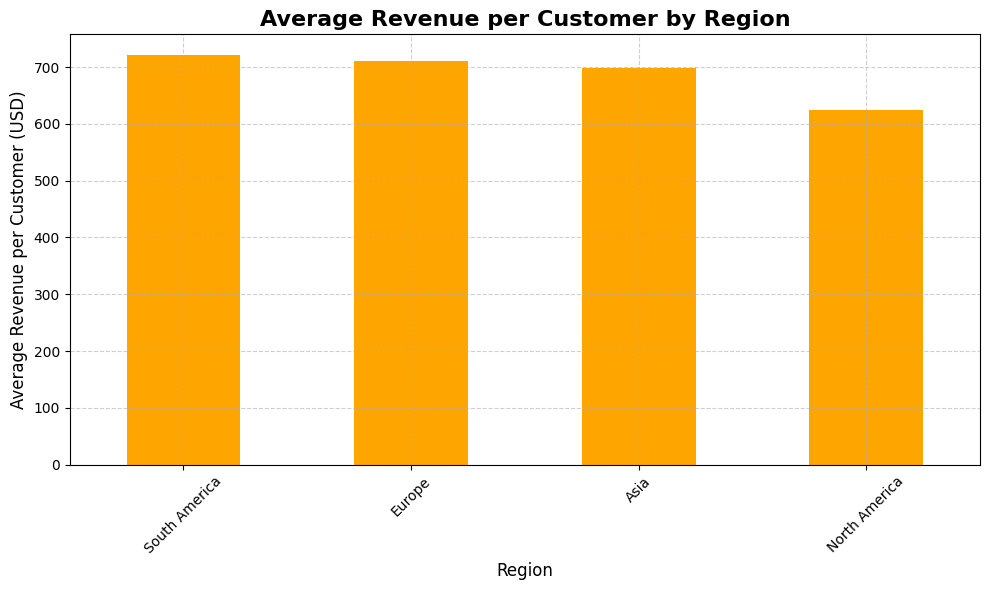

In [15]:
region_revenue = df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

region_customers = df['Region'].value_counts().sort_values(ascending=False)

revenue_per_customer = region_revenue / region_customers

revenue_per_customer = revenue_per_customer.sort_values(ascending=False)


plt.figure(figsize=(10, 6))
revenue_per_customer.plot(kind='bar', color='orange')
plt.title('Average Revenue per Customer by Region', fontsize=16, weight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Revenue per Customer (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Products by Quantity Sold

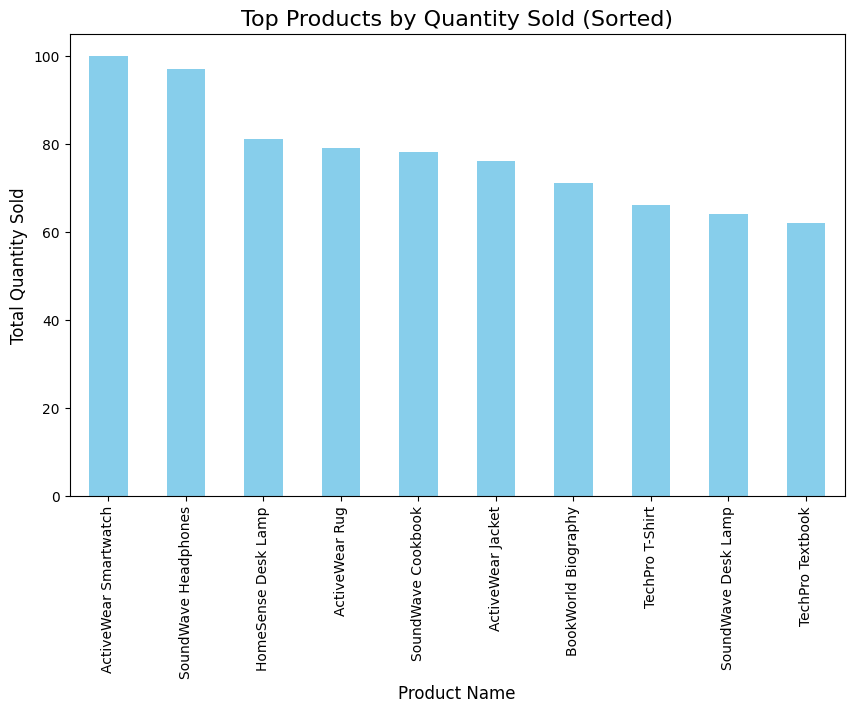

In [16]:
top_products = df.groupby('ProductName')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top Products by Quantity Sold (Sorted)', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=90)
plt.show()

#### Top 10 Products per Region

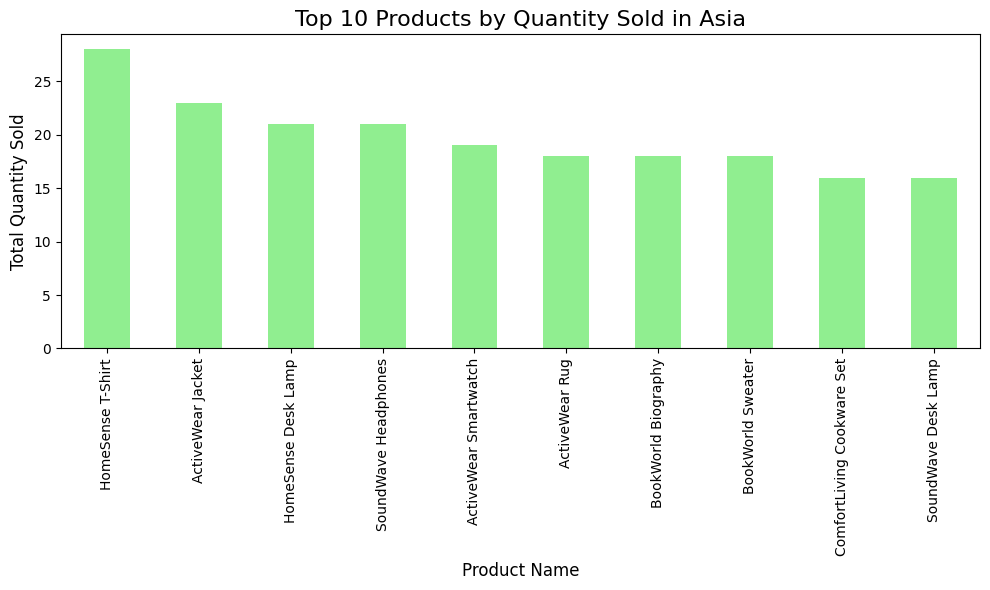

In [17]:
# 1-> ASIA


ndf = df[df['Region'] == 'Asia']

top_products_asia = ndf.groupby('ProductName')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_products_asia.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Products by Quantity Sold in Asia', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

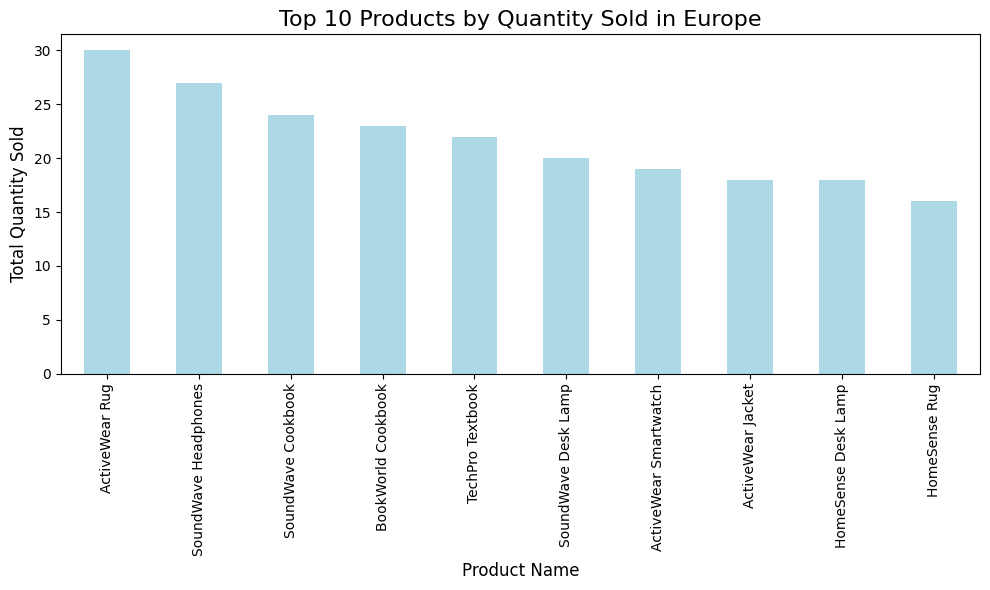

In [18]:
# 2-> EUROPE


ndf = df[df['Region'] == 'Europe']

top_products_eu = ndf.groupby('ProductName')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_products_eu.plot(kind='bar', color='lightblue')
plt.title('Top 10 Products by Quantity Sold in Europe', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

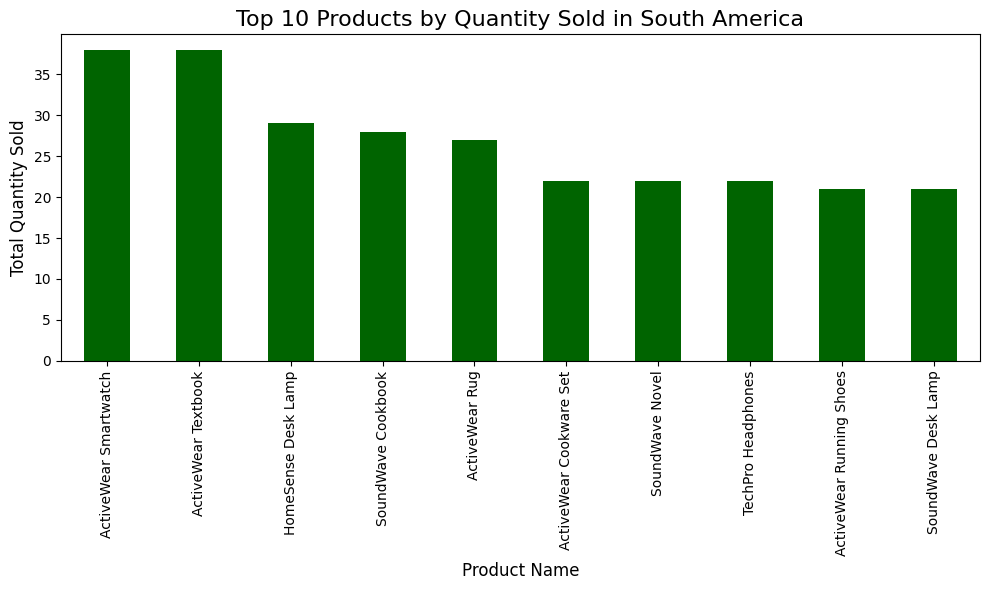

In [19]:
# 3-> SOUTH AMERICA


ndf = df[df['Region'] == 'South America']

top_products_sa = ndf.groupby('ProductName')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_products_sa.plot(kind='bar', color='darkgreen')
plt.title('Top 10 Products by Quantity Sold in South America', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

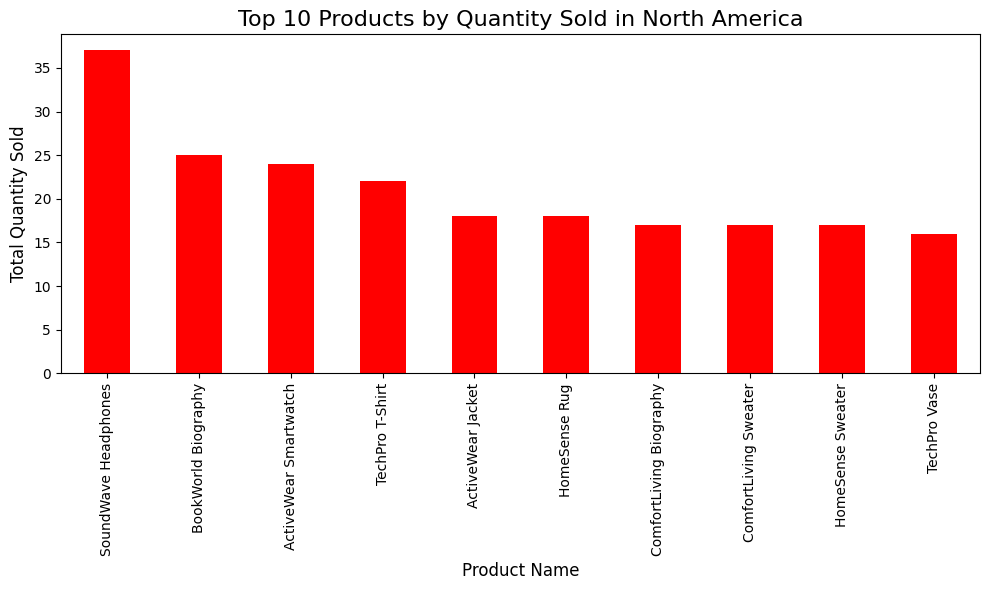

In [20]:
# 4-> NORTH AMERICA


ndf = df[df['Region'] == 'North America']

top_products_na = ndf.groupby('ProductName')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_products_na.plot(kind='bar', color='red')
plt.title('Top 10 Products by Quantity Sold in North America', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Revenue Contribution by Category

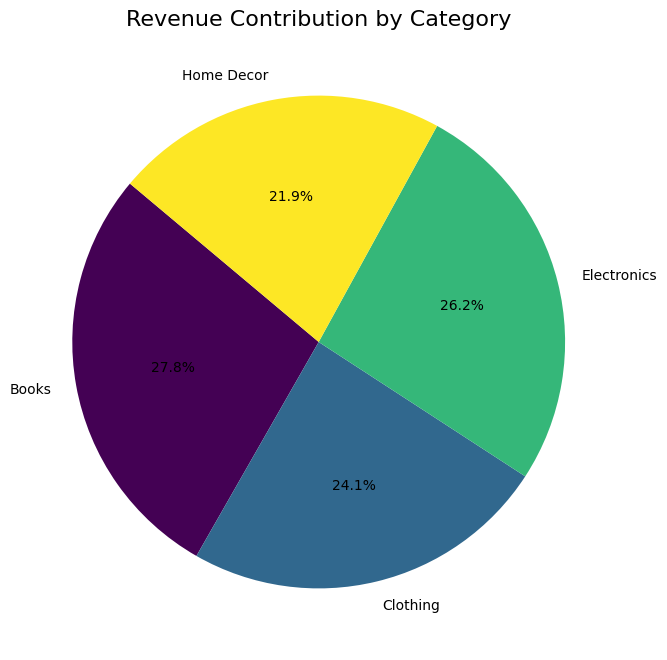

In [21]:
category_revenue = df.groupby('Category')['TotalValue'].sum()

plt.figure(figsize=(8, 8))
category_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('Revenue Contribution by Category', fontsize=16)
plt.ylabel('')
plt.show()

#### By Regions

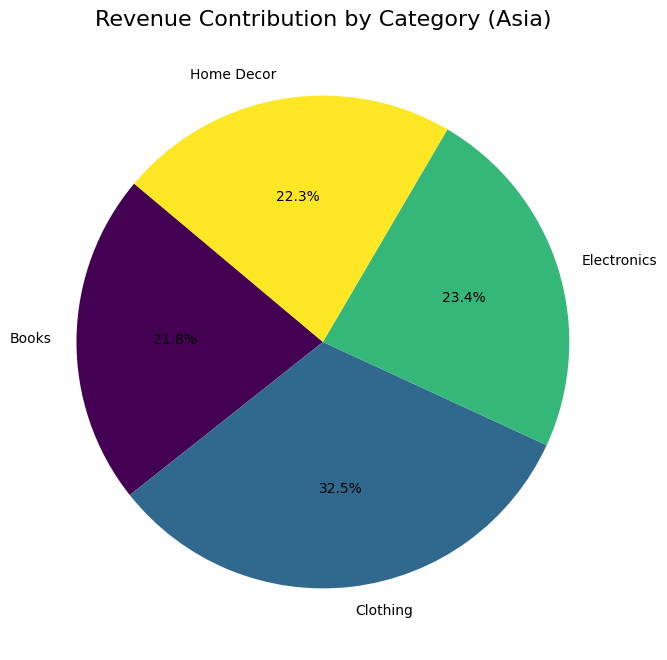

In [22]:
# ASIA

ndf = df[df['Region'] == 'Asia']

category_revenue_asia = ndf.groupby('Category')['TotalValue'].sum()

plt.figure(figsize=(8, 8))
category_revenue_asia.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('Revenue Contribution by Category (Asia)', fontsize=16)
plt.ylabel('')
plt.show()

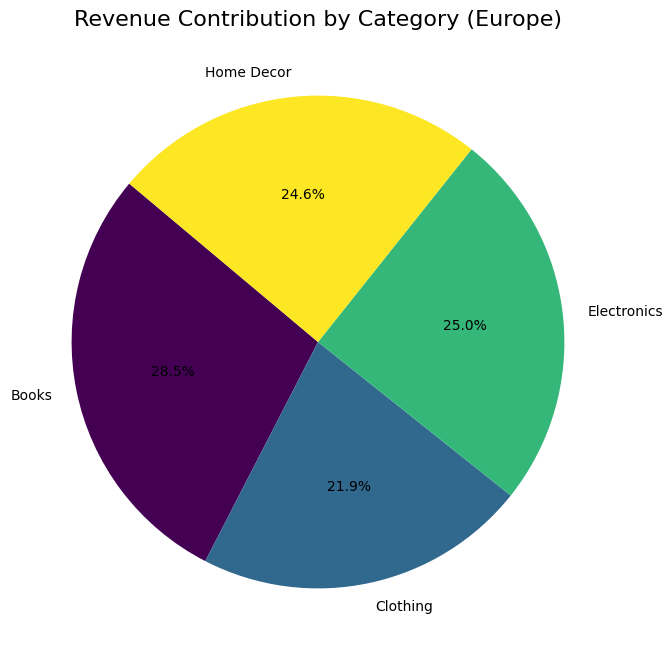

In [23]:
# EUROPE

ndf = df[df['Region'] == 'Europe']

category_revenue_eu = ndf.groupby('Category')['TotalValue'].sum()

plt.figure(figsize=(8, 8))
category_revenue_eu.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('Revenue Contribution by Category (Europe)', fontsize=16)
plt.ylabel('')
plt.show()

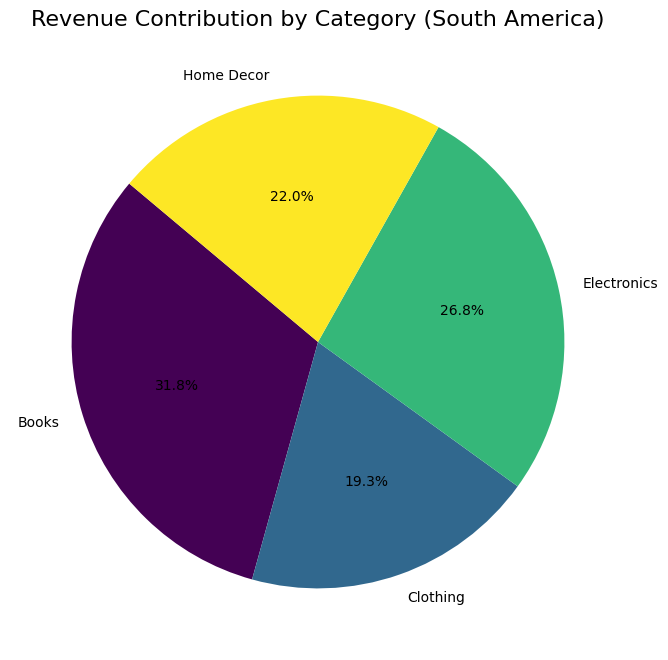

In [24]:
# SOUTH AMERICA

ndf = df[df['Region'] == 'South America']

category_revenue_sa = ndf.groupby('Category')['TotalValue'].sum()

plt.figure(figsize=(8, 8))
category_revenue_sa.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('Revenue Contribution by Category (South America)', fontsize=16)
plt.ylabel('')
plt.show()

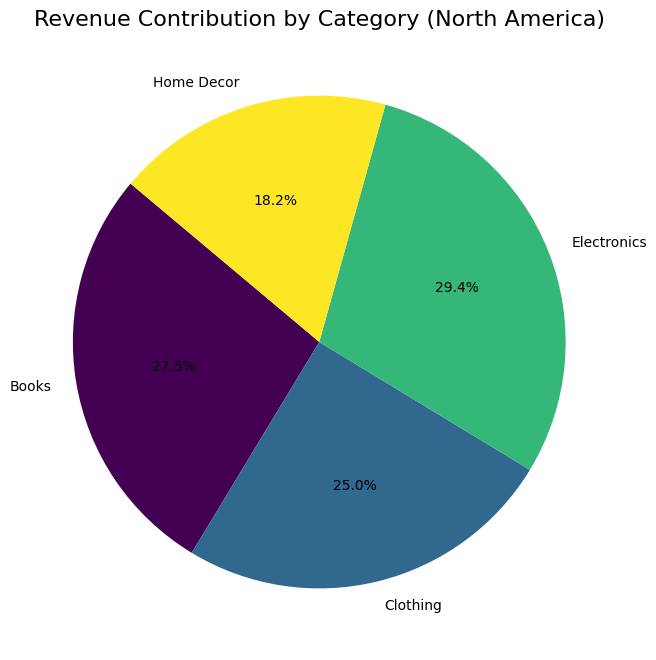

In [25]:
# NORTH AMERICA

ndf = df[df['Region'] == 'North America']

category_revenue_na = ndf.groupby('Category')['TotalValue'].sum()

plt.figure(figsize=(8, 8))
category_revenue_na.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='viridis')
plt.title('Revenue Contribution by Category (North America)', fontsize=16)
plt.ylabel('')
plt.show()

## Revenue Trends Over Time

#### Daily Reveneu

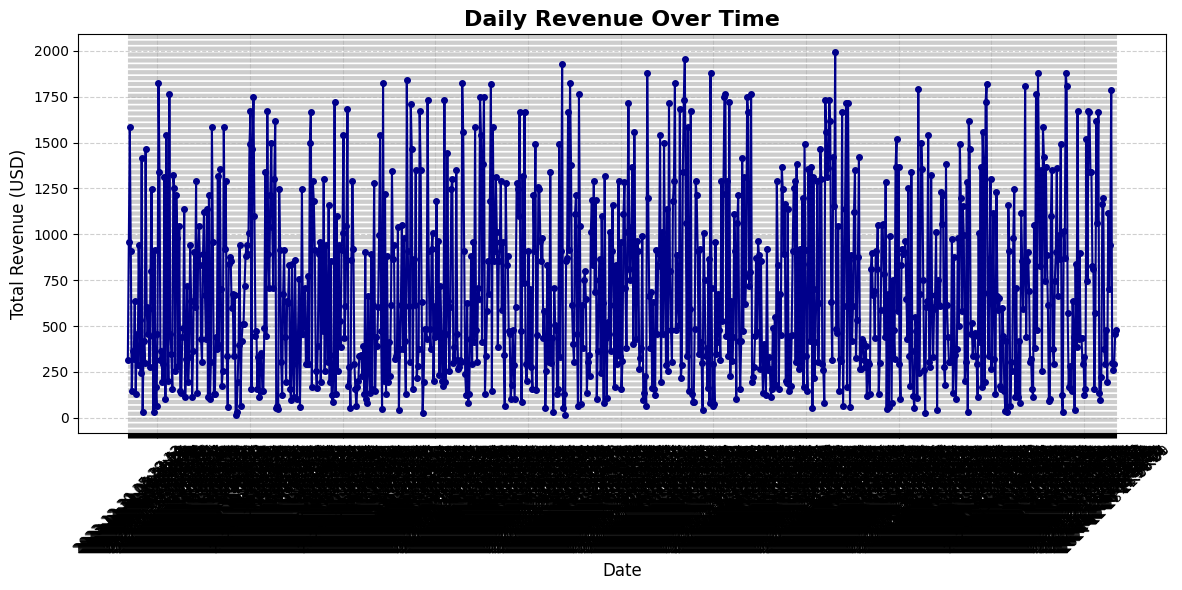

In [28]:
daily_revenue = df.groupby('TransactionDate')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_revenue.index, daily_revenue.values, color='darkblue', marker='o', linestyle='-', markersize=4)
plt.title('Daily Revenue Over Time', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Quaterly Revenue

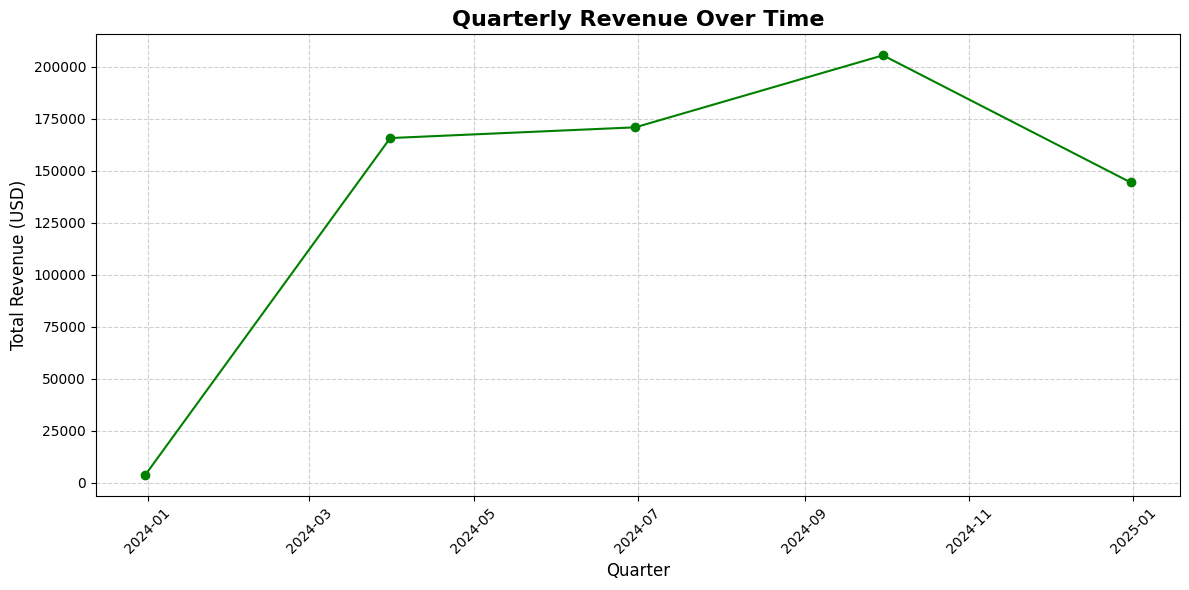

In [33]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

quarterly_revenue = df.resample('Q', on='TransactionDate')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
plt.plot(quarterly_revenue.index, quarterly_revenue.values, color='green', marker='o', linestyle='-', markersize=6)
plt.title('Quarterly Revenue Over Time', fontsize=16, weight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Quantity Purchased

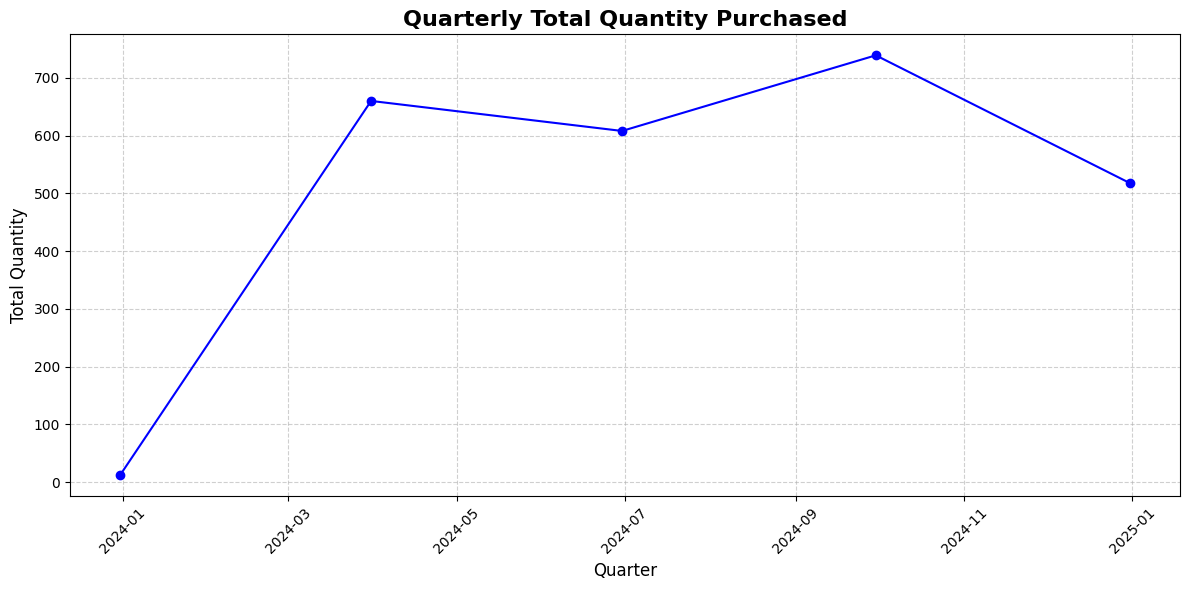

In [43]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
quarterly_quantity = df.resample('Q', on='TransactionDate')['Quantity'].sum()

plt.figure(figsize=(12, 6))
plt.plot(quarterly_quantity.index, quarterly_quantity.values, color='blue', marker='o', linestyle='-', markersize=6)
plt.title('Quarterly Total Quantity Purchased', fontsize=16, weight='bold')
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Quantity', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Signup Trends Over Time

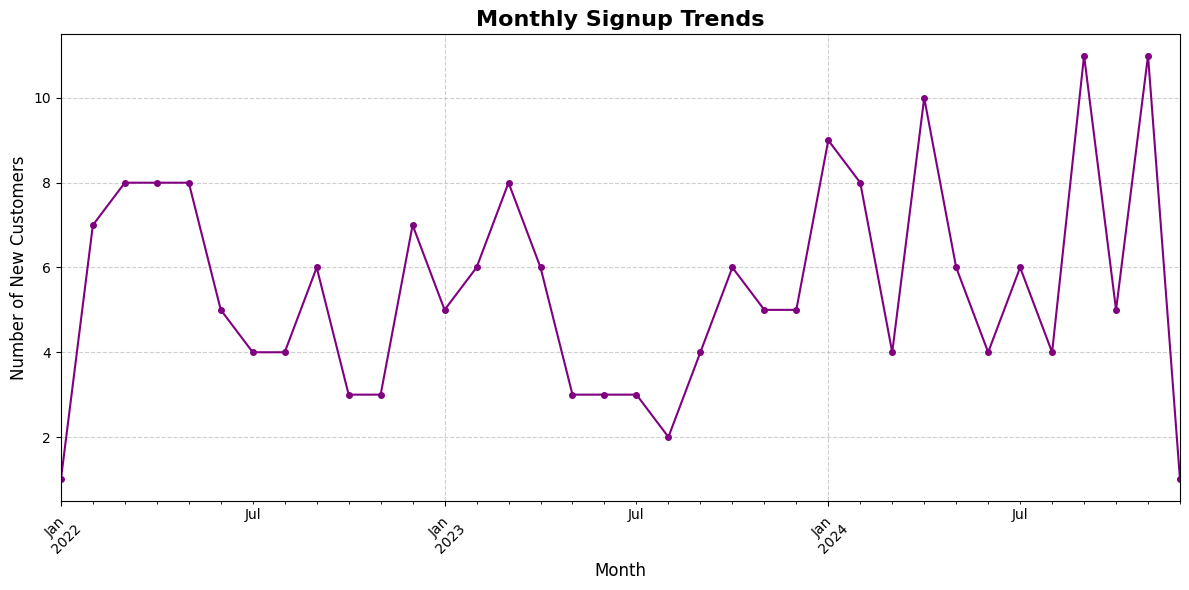

In [42]:
df['SignupDate'] = pd.to_datetime(df['SignupDate'])

signup_trends = df.groupby(df['SignupDate'].dt.to_period('M'))['CustomerID'].nunique()

plt.figure(figsize=(12, 6))
signup_trends.plot(kind='line', color='purple', marker='o', linestyle='-', markersize=4)
plt.title('Monthly Signup Trends', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of New Customers', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Price v Category Sold

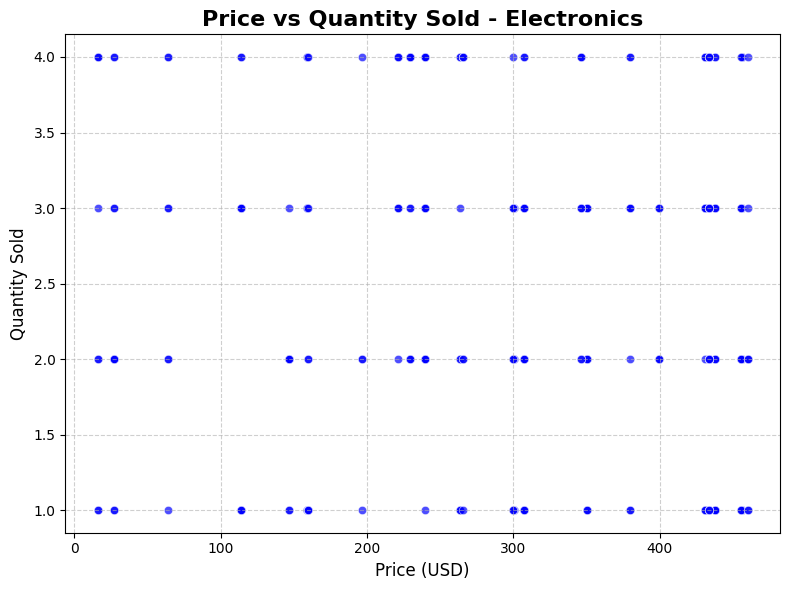

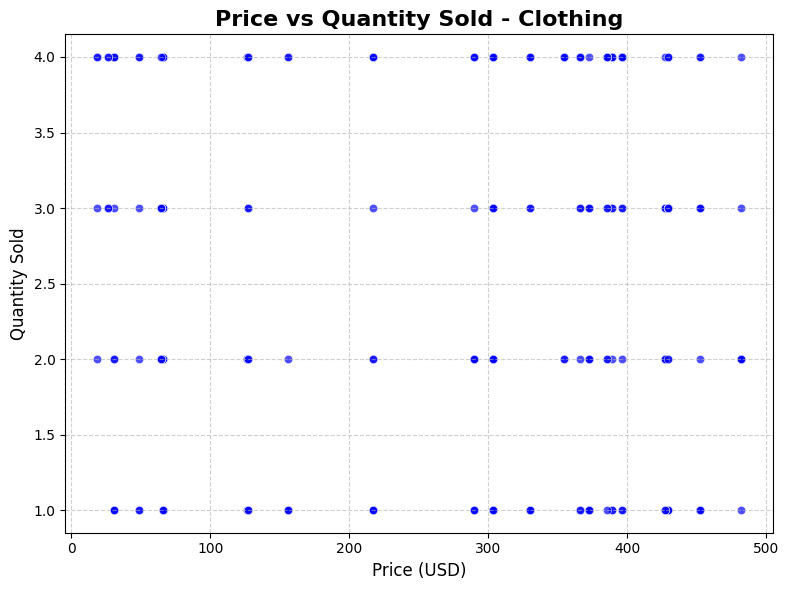

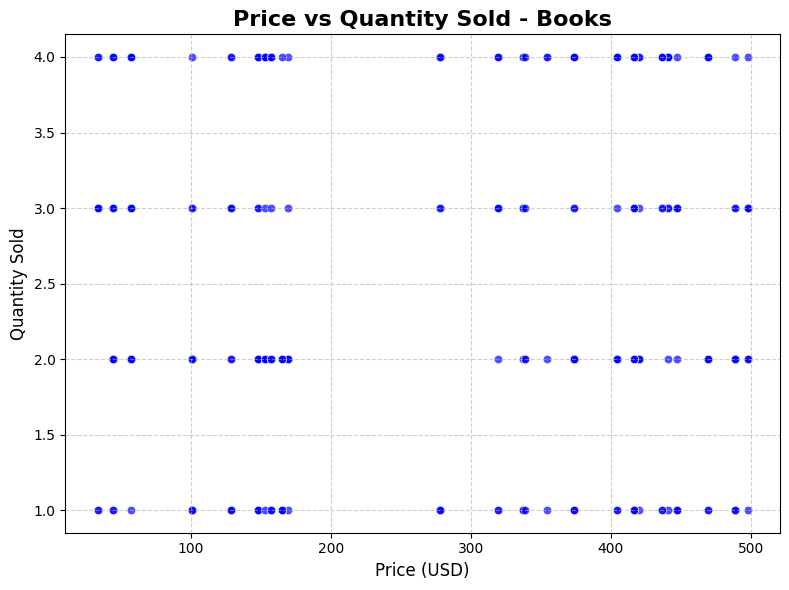

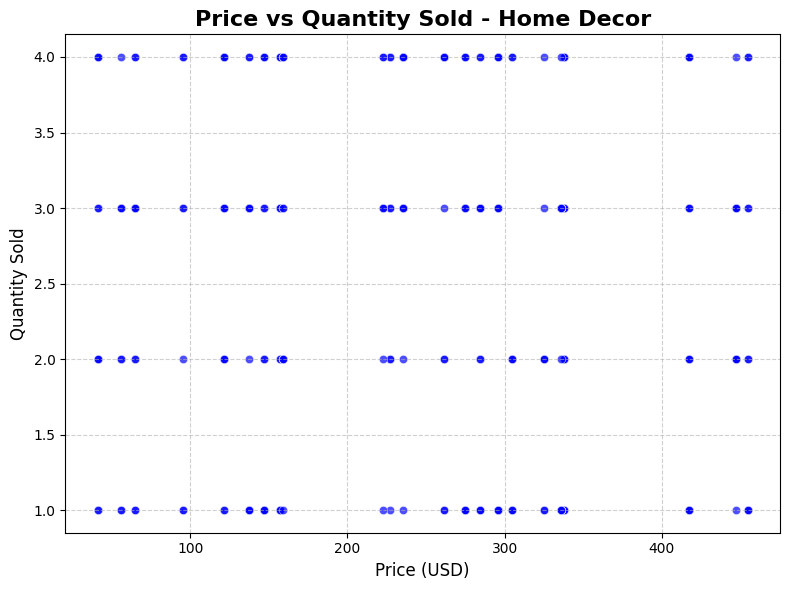

In [35]:
categories = df['Category'].unique()

for category in categories:
    category_data = df[df['Category'] == category]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=category_data, x='Price_y', y='Quantity', color='blue', alpha=0.7)
    plt.title(f'Price vs Quantity Sold - {category}', fontsize=16, weight='bold')
    plt.xlabel('Price (USD)', fontsize=12)
    plt.ylabel('Quantity Sold', fontsize=12)
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Customer Retention

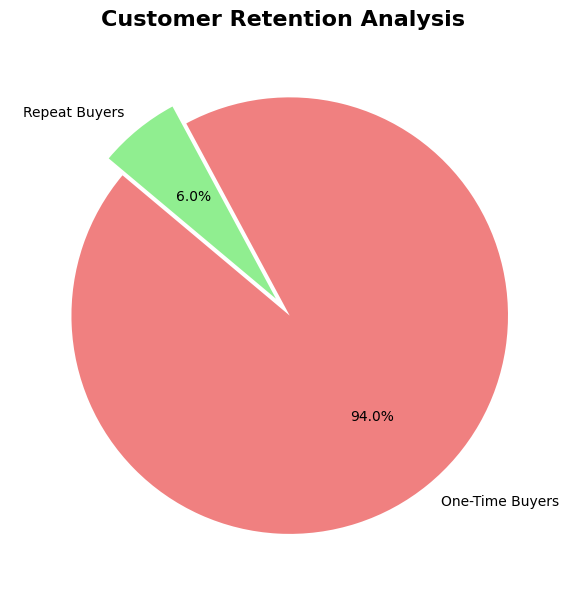

In [36]:
repeat_customers = df.groupby('CustomerID')['TransactionDate'].count().reset_index()

repeat_customers['Repeat'] = repeat_customers['TransactionDate'] > 1

repeat_counts = repeat_customers['Repeat'].value_counts()

plt.figure(figsize=(6, 6))
repeat_counts.plot(kind='pie', autopct='%1.1f%%', labels=['One-Time Buyers', 'Repeat Buyers'], startangle=140, colors=['lightcoral', 'lightgreen'], explode=[0.05, 0.05])
plt.title('Customer Retention Analysis', fontsize=16, weight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

#### Customer Retention by Region

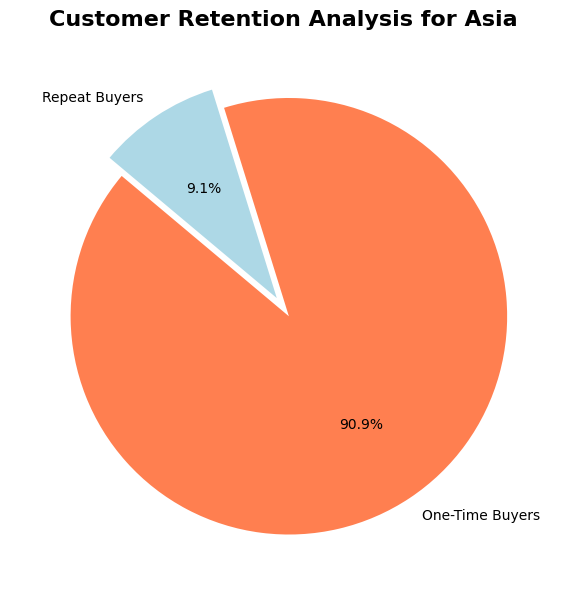

In [37]:
# ASIA


ndf = df[df['Region'] == 'Asia']

repeat_customers_asia = ndf.groupby(['CustomerID'])['TransactionDate'].count().reset_index()

repeat_customers_asia['Repeat'] = repeat_customers_asia['TransactionDate'] > 1

repeat_counts_asia = repeat_customers_asia['Repeat'].value_counts()

plt.figure(figsize=(6, 6))
repeat_counts_asia.plot(kind='pie', autopct='%1.1f%%', labels=['One-Time Buyers', 'Repeat Buyers'], startangle=140,
                        colors=['coral', 'lightblue'], explode=[0.05, 0.05])
plt.title('Customer Retention Analysis for Asia', fontsize=16, weight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

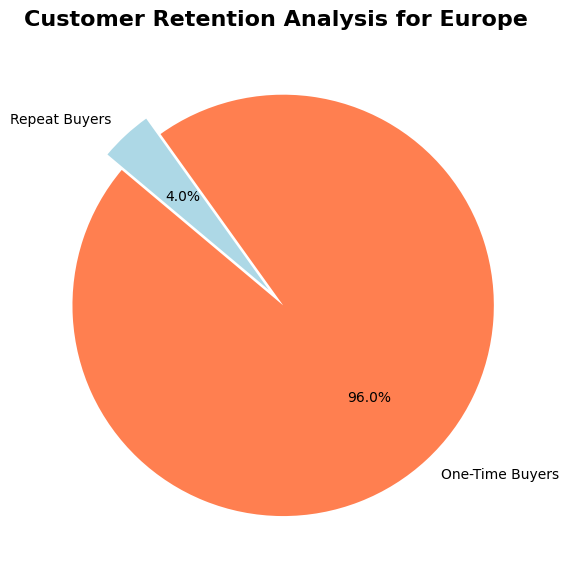

In [38]:
# EUROPE


ndf = df[df['Region'] == 'Europe']

repeat_customers_eu = ndf.groupby(['CustomerID'])['TransactionDate'].count().reset_index()

repeat_customers_eu['Repeat'] = repeat_customers_eu['TransactionDate'] > 1

repeat_counts_eu = repeat_customers_eu['Repeat'].value_counts()

plt.figure(figsize=(6, 6))
repeat_counts_eu.plot(kind='pie', autopct='%1.1f%%', labels=['One-Time Buyers', 'Repeat Buyers'], startangle=140,
                        colors=['coral', 'lightblue'], explode=[0.05, 0.05])
plt.title('Customer Retention Analysis for Europe', fontsize=16, weight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

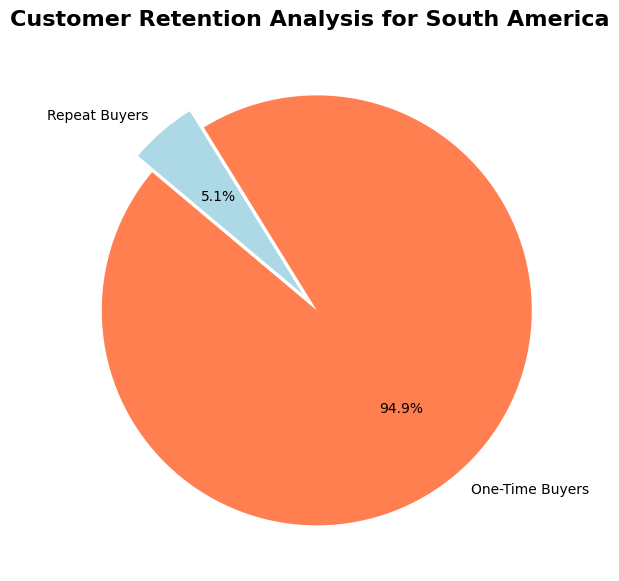

In [39]:
# SOUTH AMERICA


ndf = df[df['Region'] == 'South America']

repeat_customers_sa = ndf.groupby(['CustomerID'])['TransactionDate'].count().reset_index()

repeat_customers_sa['Repeat'] = repeat_customers_sa['TransactionDate'] > 1

repeat_counts_sa = repeat_customers_sa['Repeat'].value_counts()

plt.figure(figsize=(6, 6))
repeat_counts_sa.plot(kind='pie', autopct='%1.1f%%', labels=['One-Time Buyers', 'Repeat Buyers'], startangle=140,
                        colors=['coral', 'lightblue'], explode=[0.05, 0.05])
plt.title('Customer Retention Analysis for South America', fontsize=16, weight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

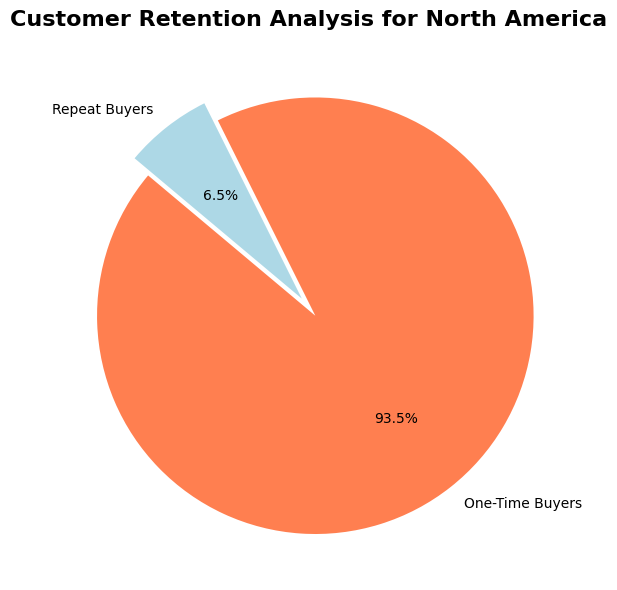

In [40]:
# NORTH AMERICA


ndf = df[df['Region'] == 'North America']

repeat_customers_na = ndf.groupby(['CustomerID'])['TransactionDate'].count().reset_index()

repeat_customers_na['Repeat'] = repeat_customers_na['TransactionDate'] > 1

repeat_counts_na = repeat_customers_na['Repeat'].value_counts()

plt.figure(figsize=(6, 6))
repeat_counts_na.plot(kind='pie', autopct='%1.1f%%', labels=['One-Time Buyers', 'Repeat Buyers'], startangle=140,
                        colors=['coral', 'lightblue'], explode=[0.05, 0.05])
plt.title('Customer Retention Analysis for North America', fontsize=16, weight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

#### By Category

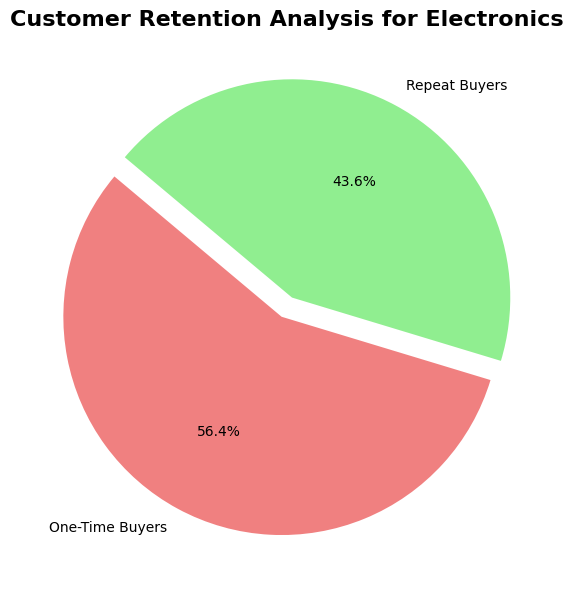

In [44]:
category = 'Electronics'
cdf = df[df['Category'] == category]

repeat_customers_cat = cdf.groupby('CustomerID')['TransactionDate'].count().reset_index()
repeat_customers_cat['Repeat'] = repeat_customers_cat['TransactionDate'] > 1

repeat_counts_cat = repeat_customers_cat['Repeat'].value_counts()

plt.figure(figsize=(6, 6))
repeat_counts_cat.plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=['One-Time Buyers', 'Repeat Buyers'],
    startangle=140,
    colors=['lightcoral', 'lightgreen'],
    explode=[0.05, 0.05]
)
plt.title(f'Customer Retention Analysis for {category}', fontsize=16, weight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

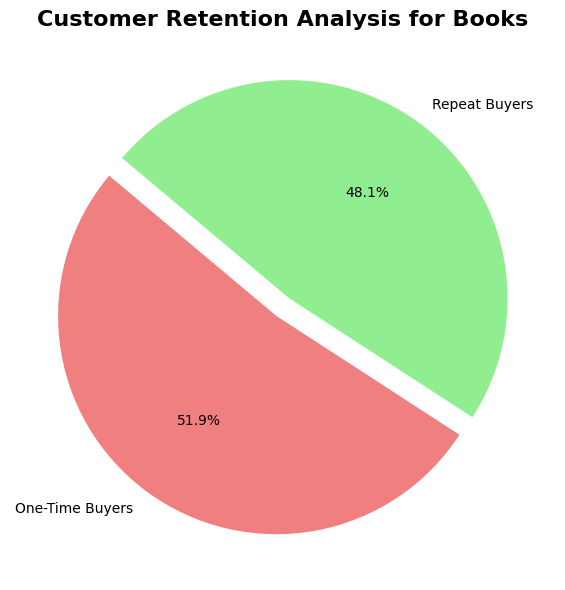

In [45]:
category = 'Books'
cdf = df[df['Category'] == category]

repeat_customers_cat = cdf.groupby('CustomerID')['TransactionDate'].count().reset_index()
repeat_customers_cat['Repeat'] = repeat_customers_cat['TransactionDate'] > 1

repeat_counts_cat = repeat_customers_cat['Repeat'].value_counts()

plt.figure(figsize=(6, 6))
repeat_counts_cat.plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=['One-Time Buyers', 'Repeat Buyers'],
    startangle=140,
    colors=['lightcoral', 'lightgreen'],
    explode=[0.05, 0.05]
)
plt.title(f'Customer Retention Analysis for {category}', fontsize=16, weight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

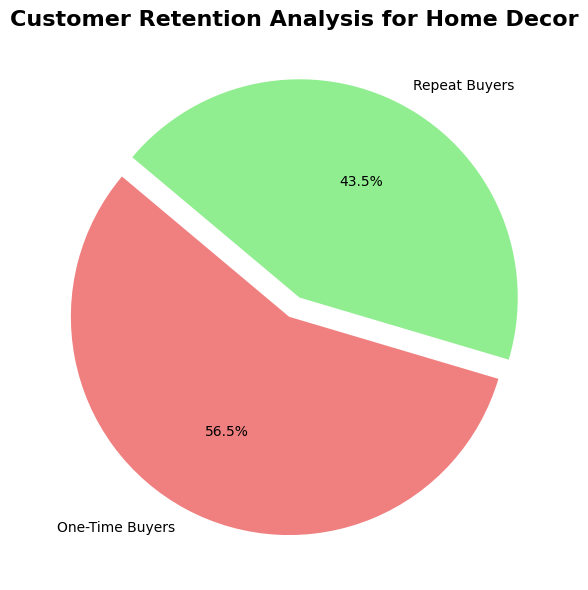

In [47]:
category = 'Home Decor'
cdf = df[df['Category'] == category]

repeat_customers_cat = cdf.groupby('CustomerID')['TransactionDate'].count().reset_index()
repeat_customers_cat['Repeat'] = repeat_customers_cat['TransactionDate'] > 1

repeat_counts_cat = repeat_customers_cat['Repeat'].value_counts()

plt.figure(figsize=(6, 6))
repeat_counts_cat.plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=['One-Time Buyers', 'Repeat Buyers'],
    startangle=140,
    colors=['lightcoral', 'lightgreen'],
    explode=[0.05, 0.05]
)
plt.title(f'Customer Retention Analysis for {category}', fontsize=16, weight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

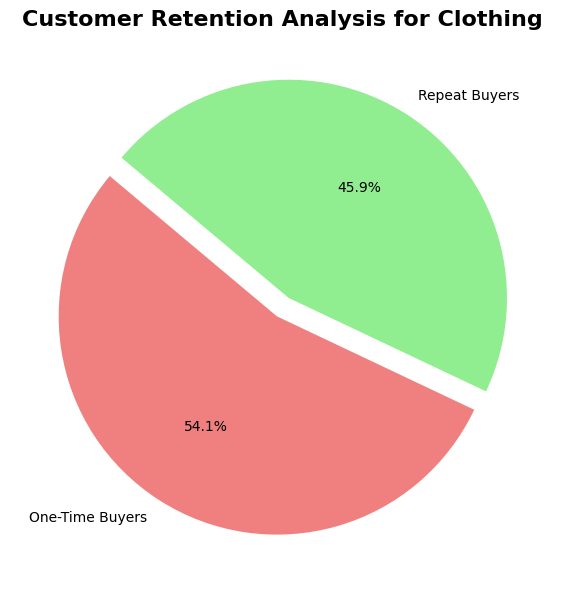

In [48]:
category = 'Clothing'
cdf = df[df['Category'] == category]

repeat_customers_cat = cdf.groupby('CustomerID')['TransactionDate'].count().reset_index()
repeat_customers_cat['Repeat'] = repeat_customers_cat['TransactionDate'] > 1

repeat_counts_cat = repeat_customers_cat['Repeat'].value_counts()

plt.figure(figsize=(6, 6))
repeat_counts_cat.plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=['One-Time Buyers', 'Repeat Buyers'],
    startangle=140,
    colors=['lightcoral', 'lightgreen'],
    explode=[0.05, 0.05]
)
plt.title(f'Customer Retention Analysis for {category}', fontsize=16, weight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

# High-Value Customers (Top 10 by Revenue)

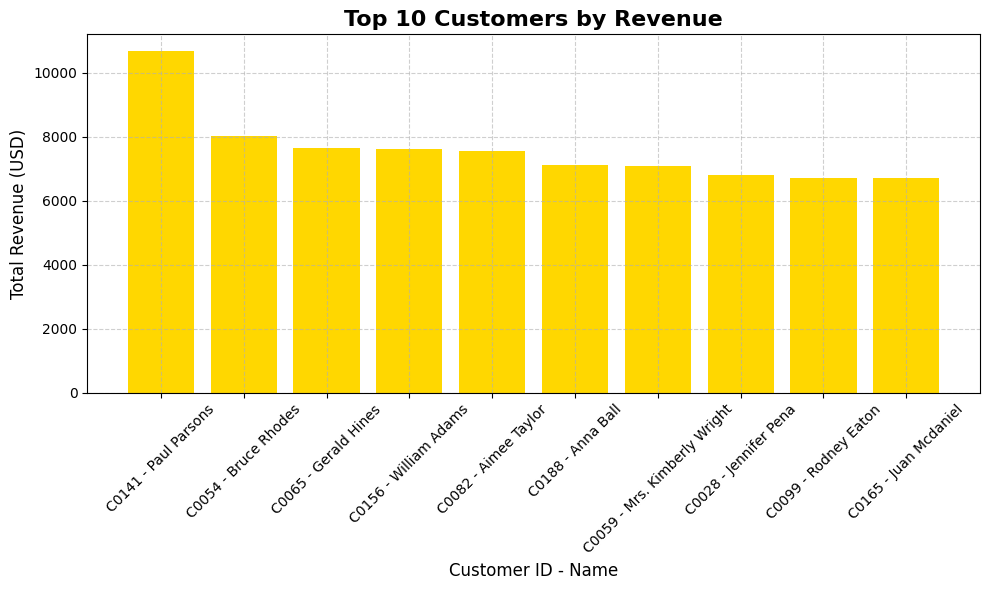

In [41]:
top_customers = df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

top_customers_df = top_customers.reset_index()

top_customers_df = top_customers_df.merge(customers[['CustomerID', 'CustomerName']], on='CustomerID', how='left')

top_customers_df['Customer'] = top_customers_df['CustomerID'].astype(str) + ' - ' + top_customers_df['CustomerName']

plt.figure(figsize=(10, 6))
plt.bar(top_customers_df['Customer'], top_customers_df['TotalValue'], color='gold')

plt.title('Top 10 Customers by Revenue', fontsize=16, weight='bold')
plt.xlabel('Customer ID - Name', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.6)

plt.tight_layout()

plt.show()